In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import netCDF4
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Read in preprocessed SST data and identify location

In [2]:
fp1 = '/glade/derecho/scratch/kristenk/sanctuaries_proc/CESM2_LE_1850to2100_monthly_3NMSsites_SST.nc'
ds = xr.open_dataset(fp1)
loc='Florida Keys NMS'

In [3]:
ds

<xarray.Dataset>
Dimensions:  (member_id: 50, time: 3012)
Coordinates:
    z_t      float32 ...
  * time     (time) object 1850-01-16 13:00:00.000001 ... 2100-12-16 12:00:00
Dimensions without coordinates: member_id
Data variables:
    SST_FGB  (member_id, time) float64 ...
    SST_FK   (member_id, time) float64 ...
    SST_GR   (member_id, time) float64 ...

In [4]:
nens = len(ds['SST_FK'].member_id)
nmon = len(ds['SST_FK'].time)
temps = ds['SST_FK'].values
nyear = int(nmon/12)
start_year = 1850

print("Dataset is", nmon, "months long (", nyear, " years, starting in", start_year, ") and has", nens, "ensemble members.")

Dataset is 3012 months long ( 251  years, starting in 1850 ) and has 50 ensemble members.


### Plot SST from a subset of data

In [5]:
ds.time[1800:2200]

<xarray.DataArray 'time' (time: 400)>
array([cftime.DatetimeNoLeap(2000, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2033, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2033, 3, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2033, 4, 16, 0, 0, 0, 0)], dtype=object)
Coordinates:
    z_t      float32 500.0
  * time     (time) object 2000-01-16 12:00:00 ... 2033-04-16 00:00:00
Attributes:
    long_name:  boundaries for time-averaging interval

CPU times: user 162 ms, sys: 2.58 ms, total: 165 ms
Wall time: 185 ms


[Text(0, 0.5, 'SST (°C)'), Text(0.5, 0, 'Year')]

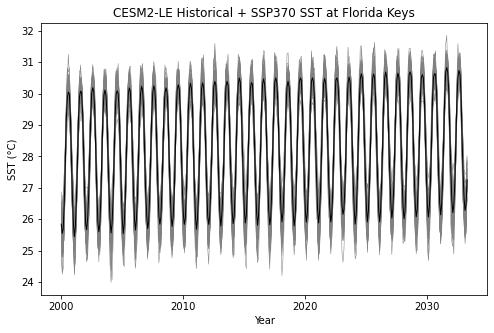

In [6]:
%%time

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('CESM2-LE Historical + SSP370 SST at Florida Keys')

da_ensmean = ds.SST_FK.mean(dim='member_id').isel(time=slice(1800,2200))

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(ds.time.isel(time=slice(1800,2200)), ds.SST_FK.isel(member_id=mem).isel(time=slice(1800,2200)),linewidth=0.5, color='gray')
ax.plot(ds.time.isel(time=slice(1800,2200)), da_ensmean,linewidth=1, color='black')
ax.set(ylabel='SST (°C)',xlabel='Year');

### Calculate static climatology

In [7]:
YEAR = np.arange(start_year, start_year + nyear)
YEAR

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

In [8]:
### Make some empty arrays
ymax = np.zeros((nens,nyear,),dtype=float)      ### year maxes
MMM = np.zeros((nens,),dtype=float)             ### mean of max of monthly temps (?)
MMMstd = np.zeros((nens,),dtype=float)          ### standard deviation in max month mean (?)

### cycle through ensemble members
for e in range(0,nens):

    ### cycle through each year of the dataset
    for y in range(0,nyear):

        ### find the index of the first month of this year
        m1 = y * 12 ## find the index of the first month of this year

        ### put the maximum temperature from this year into the ymax array
        ymax[e,y] = np.max(temps[e,m1:m1+12])
        #ymax[e,y] = np.max(temps.isel(member_id=e, time=slice(m1,m1+12)).values)

        ### take a mean and standard deviation for a chuck of the ymax years
        MMM[e]=np.average(ymax[e,30:49]) ### why do we select these years for the static climatalogy?
        MMMstd[e]=np.std(ymax[e,30:49])
        
print("For the static climatology:")
print("Max monthly temp ranges from", min(MMM), "to", max(MMM))
print("Standard deviation of temp ranges from", min(MMMstd), "to", max(MMMstd))

For the static climatology:
Max monthly temp ranges from 29.223424354074147 to 29.625168134203093
Standard deviation of temp ranges from 0.18210382571022785 to 0.4622838633200996


### CALCULATE ROLLING CLIMATOLOGY - 50 year

In [9]:
nyadap = 50 ### 50 year adaptation rate

MMM50 = np.zeros((nens,nyear),dtype=float)

MMMstd50 = np.zeros((nens,nyear),dtype=float)

### cycle through ensemble members
for e in range(0,nens):

    ### cycle through each year of the dataset, starting 50 years in since it's a rolling climatology
    for year in range(nyadap,nyear):

        ### now ymax is a 50-year array of maximum of monthly temperatures
        ymax = np.zeros((nyadap),dtype=float)

        ### cycle through the 50 years needed to make the climatology (going backwards)
        for y in range(nyadap,0,-1):

            ### find the index of the first month
            m1 = (year - y) * 12

            ### and find max temp for each of these 50 years
            ymax[nyadap-y] = np.max(temps[e,m1:m1+12])

        ### now take average and standard deviation of this 50 year chunk
        MMM50[e,year]=np.average(ymax)
        MMMstd50[e,year]=np.std(ymax)

    print("ENS MEM:", e, "For first 50 years of rolling climatology:")
    print("Max monthly temp ranges from", min(MMM50[e,nyadap:nyadap+50]), "to", max(MMM50[e,nyadap:nyadap+50]))
    print("Standard deviation of temp ranges from", min(MMMstd50[e,nyadap:nyadap+50]), "to", max(MMMstd50[e,nyadap:nyadap+50]))
    print("---------------------")

ENS MEM: 0 For first 50 years of rolling climatology:
Max monthly temp ranges from 29.36574675634071 to 29.4674789182749
Standard deviation of temp ranges from 0.29346828382389073 to 0.3391482487557254
---------------------
ENS MEM: 1 For first 50 years of rolling climatology:
Max monthly temp ranges from 29.34017819490014 to 29.462001582489908
Standard deviation of temp ranges from 0.2804639894533505 to 0.33548440509123406
---------------------
ENS MEM: 2 For first 50 years of rolling climatology:
Max monthly temp ranges from 29.437172326249833 to 29.502354384635797
Standard deviation of temp ranges from 0.25151557980139916 to 0.28856560180714563
---------------------
ENS MEM: 3 For first 50 years of rolling climatology:
Max monthly temp ranges from 29.457486531806598 to 29.52380225555004
Standard deviation of temp ranges from 0.2782041182314732 to 0.3125898198077141
---------------------
ENS MEM: 4 For first 50 years of rolling climatology:
Max monthly temp ranges from 29.46827258505

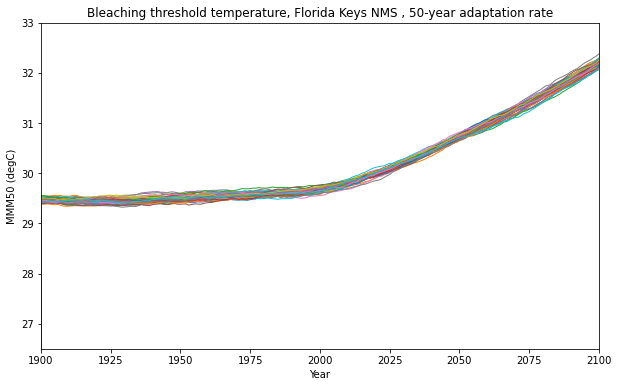

In [10]:
# PLOT THE DATA
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Bleaching threshold temperature, '+ loc + ' , 50-year adaptation rate')

for e in range(0,nens):
    ax.plot(YEAR, MMM50[e,:], linewidth=1)
    ax.set(ylabel='MMM50 (degC)',xlabel='Year')
    ax.set(xlim=[1900,2100],ylim=[26.5,33]) #### NEED to adjust y-axis for each dataset

### Calculate Degree Heating Months (DHM) for Rolling climatology

In [11]:
#set up empty dataset for DHM and temp anomaly with 50-year adaptation
DHM50 = np.zeros((nens,nmon,),dtype=float) 
anomaly50 = np.zeros((nens,nmon,),dtype=float)

### the additional temperature threshold beyond climatological maximum that is included in DHM, this was set to zero in Joanie's code
threshold=0.0

### cycle through the ensemble members
for e in range(0,nens):

    ### cycle through all the months, excluding the first 50 years (50 years * 12 months/year)
    for m in range(nyadap*12,nmon):

        ### figure out the year
        y = int(m/12)

        ### now calculate how much this month exceeds the rolling 50-year climatological maximum, otherwise anomaly is zero
        if temps[e,m] > MMM50[e,y] + threshold:
            anomaly50[e,m] = temps[e,m] - (MMM50[e,y] + threshold)

### cycle through the ensemble members
for e in range(0,nens):

    ### cycle through all the months, summing over 3 month windows
    for m in range(3,nmon):
        DHM50[e,m] = np.sum(anomaly50[e,m-2:m+1]) ### why exclude first month (anomaly50[e,1:4])??
        #print(e,m,anomaly50[e,m],DHM50[e,m]);

### convert DHM50 to xarray and add it to the original dataset
ds['DHM50'] = xr.DataArray(DHM50,dims=('member_id','time'))

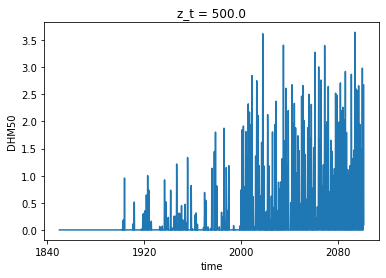

In [12]:
ds['DHM50'].isel(member_id=0).plot()

### Calculate max level of bleaching within each calendar year

In [13]:
nens

50

In [14]:
### create empty arrays for bleaching indices
bleach = np.zeros((nens,nyear),dtype=int)
max_DHM_year = np.zeros((nens,nyear),dtype=float)
sum_DHM_year = np.zeros((nens,nyear),dtype=float)
bleachtot = np.zeros((nens,nyear),dtype=int)
bleachyear = np.zeros((nens),dtype=int)
bleachyear2 = np.zeros((nens),dtype=int)

### find monthly index starting point
mstart = nyadap*12

### cycle through the ensemble members
for e in range(0,nens):
    bleachyear[e]=0
    bleachyear2[e]=0

    print('ensemble member:', e)
    
    ### cycle through all the years, excluding the first 50 years (50 years * 12 months/year), grabbing 12 months at a time
    for m in range(mstart, nmon, 12):

        #figure out the year
        y = int(m/12)

        ### find out max degree heating months for this particular year
        max_DHM_year[e,y] = np.max(DHM50[e,m:m+12])
        bleach[e,y] = int(max_DHM_year[e,y])

        ### sum up the degree heating months for this particular year
        sum_DHM_year[e,y] = np.sum(DHM50[e,m:m+12])
        bleachtot[e,y] = int(sum_DHM_year[e,y])
        
        ### figure out first years of severe and very severe bleaching (?????) is this the 6 and 9 DHM sum meaning?
        if (bleachtot[e,y] >= 6) and (bleachyear[e] == 0):
            bleachyear[e] = YEAR[y]
        if (bleachtot[e,y] >= 9) and (bleachyear2[e] == 0):
            bleachyear2[e] = YEAR[y]

    print('max bleach index (DHM):', max(bleach[e,:]))
    print('max bleachtot index (DHM sum):', max(bleachtot[e,:]))

    print('earliest year of severe bleaching:', bleachyear[e])
    print('earliest year of very severe bleaching:', bleachyear[e])
    print('----------------------------')

ensemble member: 0
max bleach index (DHM): 3
max bleachtot index (DHM sum): 12
earliest year of severe bleaching: 2005
earliest year of very severe bleaching: 2005
----------------------------
ensemble member: 1
max bleach index (DHM): 3
max bleachtot index (DHM sum): 12
earliest year of severe bleaching: 1948
earliest year of very severe bleaching: 1948
----------------------------
ensemble member: 2
max bleach index (DHM): 3
max bleachtot index (DHM sum): 11
earliest year of severe bleaching: 2004
earliest year of very severe bleaching: 2004
----------------------------
ensemble member: 3
max bleach index (DHM): 3
max bleachtot index (DHM sum): 14
earliest year of severe bleaching: 2003
earliest year of very severe bleaching: 2003
----------------------------
ensemble member: 4
max bleach index (DHM): 3
max bleachtot index (DHM sum): 11
earliest year of severe bleaching: 2005
earliest year of very severe bleaching: 2005
----------------------------
ensemble member: 5
max bleach index

### Now make output dataset

In [15]:
ds_bleach = xr.Dataset()

ds_bleach['bleaching_index'] = xr.DataArray(bleach,dims=('member_id','time'))
ds_bleach['member_id'] = np.arange(1,nens+1,1)
ds_bleach['time'] = np.arange(start_year,start_year+nyear,1)

ds_bleach['DHM_max'] = xr.DataArray(max_DHM_year,dims=('member_id','time'))

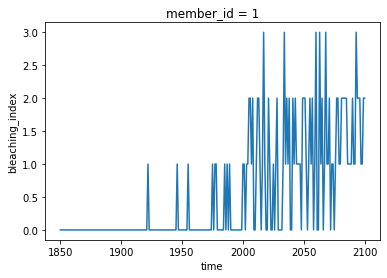

In [16]:
ds_bleach.bleaching_index.isel(member_id=0).plot()

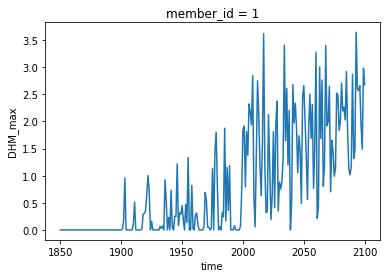

In [17]:
ds_bleach.DHM_max.isel(member_id=0).plot()

In [18]:
ds_bleach.time

<xarray.DataArray 'time' (time: 251)>
array([1850, 1851, 1852, ..., 2098, 2099, 2100])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100

In [19]:
#colors = ['black','lightcoral','red','darkorange','gold','lightgreen','green','darkturquoise','dodgerblue','blue','darkviolet','magenta','hotpink']

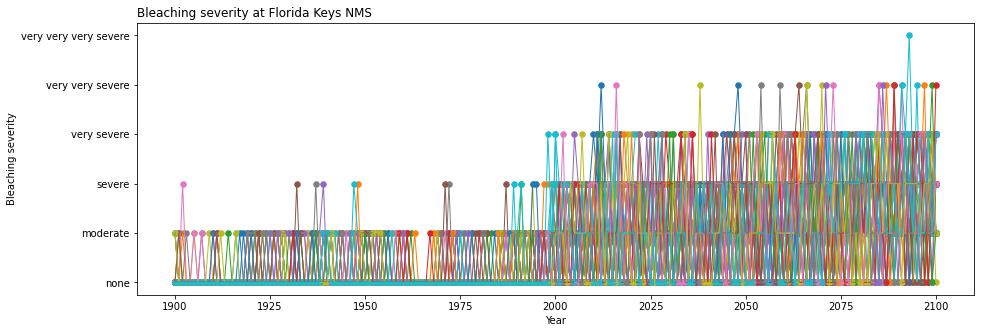

In [20]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Bleaching severity at ' + loc, loc='left')

for ens_mem in np.arange(0,50,1):
    
    ax.plot(ds_bleach.time.isel(time=slice(50,251)),ds_bleach.bleaching_index.isel(member_id=ens_mem,time=slice(50,251)),linewidth=1,label=str(ens_mem+1))
    ax.scatter(ds_bleach.time.isel(time=slice(50,251)),ds_bleach.bleaching_index.isel(member_id=ens_mem,time=slice(50,251)),s=30)
    
ax.set(ylabel='Bleaching severity',xlabel='Year')
labels=['none','moderate','severe','very severe','very very severe', 'very very very severe']
ax.set_yticks([0, 1, 2, 3, 4, 5]) 
ax.set_yticklabels(labels);
#ax.legend(title='Ensemble \n member');
#fig.savefig('/glade/work/kristenk/figs/SPuerto_Rico_13LMEmems_900to1150.png', bbox_inches='tight', dpi=300, format='png');


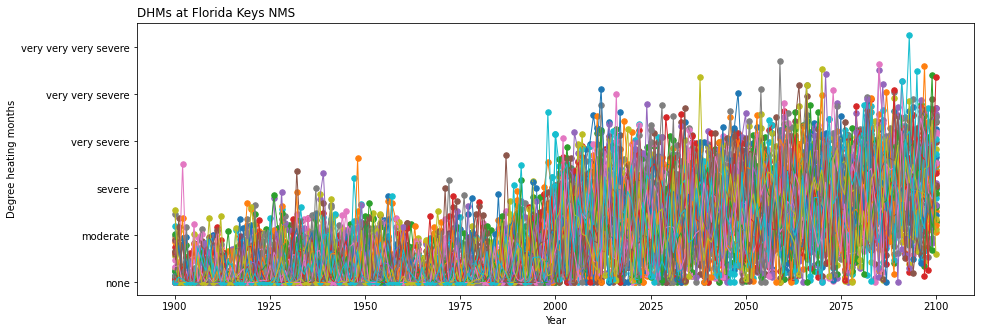

In [21]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('DHMs at ' + loc, loc='left')

for ens_mem in np.arange(0,nens,1):

    
    ax.plot(ds_bleach.time.isel(time=slice(50,251)),ds_bleach.DHM_max.isel(member_id=ens_mem,time=slice(50,251)),linewidth=1,label=str(ens_mem+1))
    ax.scatter(ds_bleach.time.isel(time=slice(50,251)),ds_bleach.DHM_max.isel(member_id=ens_mem,time=slice(50,251)),s=30)
    
ax.set(ylabel='Degree heating months',xlabel='Year')
labels=['none','moderate','severe','very severe','very very severe', 'very very very severe']
ax.set_yticks([0, 1, 2, 3, 4, 5]) 
ax.set_yticklabels(labels);
#ax.legend(title='Ensemble \n member');
#fig.savefig('/glade/work/kristenk/figs/SPuerto_Rico_13LMEmems_900to1150.png', bbox_inches='tight', dpi=300, format='png');


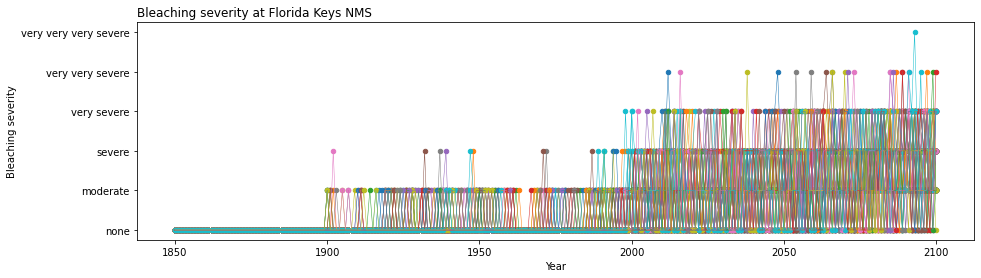

In [22]:
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(1,1,1)
ax.set_title('Bleaching severity at ' + loc, loc='left')

for ens_mem in np.arange(0,nens,1):

    
    ax.plot(ds_bleach.time,ds_bleach.bleaching_index.isel(member_id=ens_mem),linewidth=0.5,label=str(ens_mem+1))
    ax.scatter(ds_bleach.time,ds_bleach.bleaching_index.isel(member_id=ens_mem),s=20)
    
ax.set(ylabel='Bleaching severity',xlabel='Year')
labels=['none','moderate','severe','very severe','very very severe', 'very very very severe']
ax.set_yticks([0, 1, 2, 3, 4, 5]) 
ax.set_yticklabels(labels);

#ax.legend(title='Ensemble \n member');

#fig.savefig('/glade/work/kristenk/figs/SPuerto_Rico_13LMEmems_900to2005.png', bbox_inches='tight', dpi=300, format='png');


In [23]:
#For each year, calculate the number of ensemble members at each bleaching level

numens0= np.zeros((nyear),dtype=int)
numens1= np.zeros((nyear),dtype=int)
numens2= np.zeros((nyear),dtype=int)
numens3= np.zeros((nyear),dtype=int)
numens4= np.zeros((nyear),dtype=int)
numens5= np.zeros((nyear),dtype=int)
numens6= np.zeros((nyear),dtype=int)

for y in range(0,nyear):
    numens0[y]=np.size(np.where(bleach[:,y]==0))
    numens1[y]=np.size(np.where(bleach[:,y]==1))
    numens2[y]=np.size(np.where(bleach[:,y]==2))
    numens3[y]=np.size(np.where(bleach[:,y]==3))
    numens4[y]=np.size(np.where(bleach[:,y]==4))
    numens5[y]=np.size(np.where(bleach[:,y]==5))
    numens6[y]=np.size(np.where(bleach[:,y]==6))

numenstot=np.zeros((nyear),dtype=int)
for y in range(0,nyear):
    numenstot[y]=numens0[y]+numens1[y]+numens2[y]+numens3[y]+numens4[y]+numens5[y]
    
print("number ens with bleaching = 0")
print(numens0)
print("number ens with bleaching = 1")
print(numens1)
print("number ens with bleaching = 2")
print(numens2)
print("number ens with bleaching = 3")
print(numens3)
print("number ens with bleaching = 4")
print(numens4)
print("number ens with bleaching = 5")
print(numens5)
print("number ens with bleaching = 6")
print(numens6)
print("SUM")
print(numenstot)


number ens with bleaching = 0
[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 46 47 48 49 50 48 50 48 50 49 48 46 49 50 49 50 48 49 49 45 46 47
 46 48 47 48 45 47 42 47 48 47 45 44 48 47 47 44 45 43 47 44 48 48 46 48
 45 46 46 43 44 45 45 45 47 47 47 48 47 46 46 47 49 49 50 50 50 49 48 47
 47 48 47 46 46 48 48 48 46 49 48 45 48 49 49 46 45 45 46 42 40 42 47 45
 42 42 42 38 37 30 23 25 19 29 21 20 23 20 26 21 16 21 17 16 12 20 19 14
 24 16 19 23 20 22 17 18 16 17 18 21 22 14 20 14 20 14 11 11 13 18 10 11
 15 18  9 14  9  9  9 18 12 14 10 15 17 12 13 11  8  9 16  9 12 10 11  7
  9  9  7  9  9  6  9 14 10 11 13  9 13  5  4  5  6  6  6  7 10  5  3  6
  2  2  6  5  7  7  4  4  3  3  1]
number ens with bleaching = 1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  4  3  1  1  0  2  0  

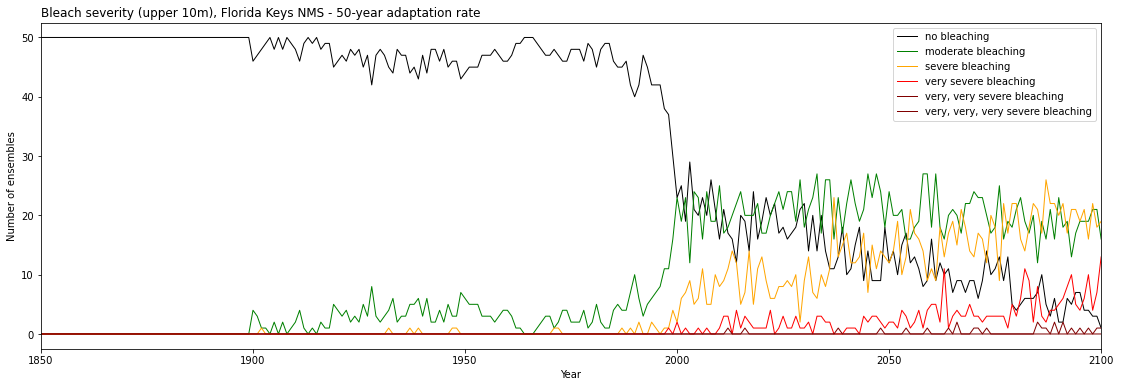

In [24]:
# PLOT THE Bleaching data for each ensemble member

fig = plt.figure(figsize=(19,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Bleach severity (upper 10m), ' + loc + ' - 50-year adaptation rate', loc='left')

ax.plot(YEAR, numens0, linewidth=1, color='black',label='no bleaching')
ax.plot(YEAR, numens1, linewidth=1, color='green', label='moderate bleaching')
ax.plot(YEAR, numens2, linewidth=1, color='orange', label='severe bleaching')
ax.plot(YEAR, numens3, linewidth=1, color='red', label='very severe bleaching')
ax.plot(YEAR, numens4, linewidth=1, color='maroon', label='very, very severe bleaching')
ax.plot(YEAR, numens5, linewidth=1, color='maroon', label='very, very, very severe bleaching')

ax.set(ylabel='Number of ensembles',xlabel='Year')
ax.set(xlim=[start_year,2100])

ax.legend();


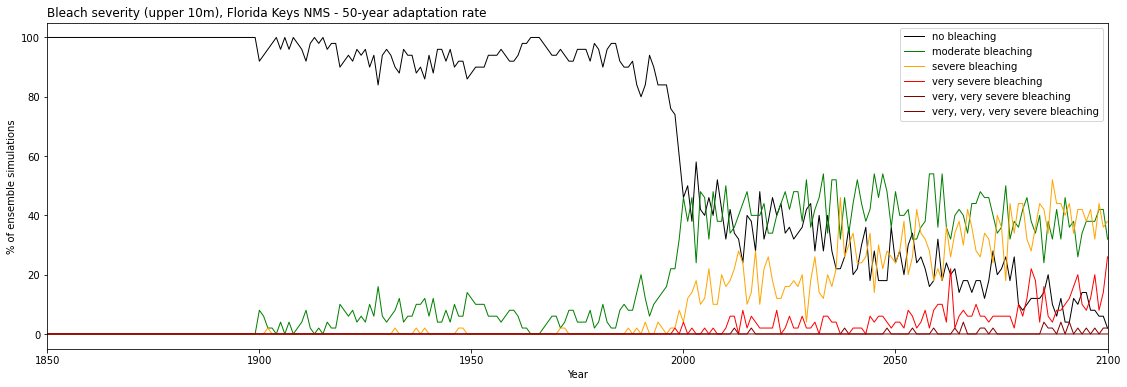

In [25]:
# PLOT THE Bleaching data for each ensemble member

fig = plt.figure(figsize=(19,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Bleach severity (upper 10m), ' + loc + ' - 50-year adaptation rate', loc='left')

ax.plot(YEAR, numens0/nens*100, linewidth=1, color='black',label='no bleaching')
ax.plot(YEAR, numens1/nens*100, linewidth=1, color='green', label='moderate bleaching')
ax.plot(YEAR, numens2/nens*100, linewidth=1, color='orange', label='severe bleaching')
ax.plot(YEAR, numens3/nens*100, linewidth=1, color='red', label='very severe bleaching')
ax.plot(YEAR, numens4/nens*100, linewidth=1, color='maroon', label='very, very severe bleaching')
ax.plot(YEAR, numens5/nens*100, linewidth=1, color='maroon', label='very, very, very severe bleaching')
ax.set(ylabel='% of ensemble simulations',xlabel='Year')
ax.set(xlim=[start_year,2100])

ax.legend();


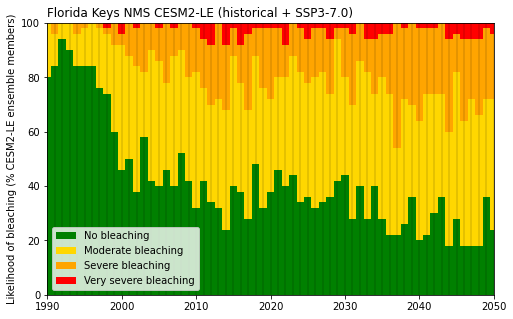

In [26]:
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title(loc+ ' CESM2-LE (historical + SSP3-7.0)', loc='left',fontsize=12)
ax.bar(YEAR, (numens0/nens*100), width, label='No bleaching', color='green')
ax.bar(YEAR, (numens1/nens*100), width, bottom=(numens0/nens*100), label='Moderate bleaching', color='gold')
ax.bar(YEAR, (numens2/nens*100), width, bottom=(numens0/nens*100)+(numens1/nens*100), label='Severe bleaching', color='orange')
ax.bar(YEAR, ((numens3+numens4+numens5)/nens*100), width, bottom=(numens0/nens*100)+(numens1/nens*100)+(numens2/nens*100), label='Very severe bleaching', color='red')
ax.set(xlim=[1990,2050])

for yr in YEAR:
    ax.axvline(yr,linewidth=0.2,color='black')
ax.set_ylabel('Likelihood of bleaching (% CESM2-LE ensemble members)')
ax.legend()

#fig.savefig('/glade/work/kristenk/figs/South_PuertoRico-Coral_bleaching_900AD-to-2005_LME.png', bbox_inches='tight', dpi=300, format='png');

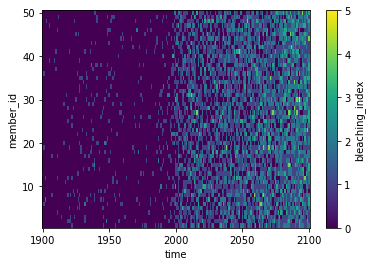

In [27]:
ds_bleach.bleaching_index.isel(time=slice(50,251)).plot()

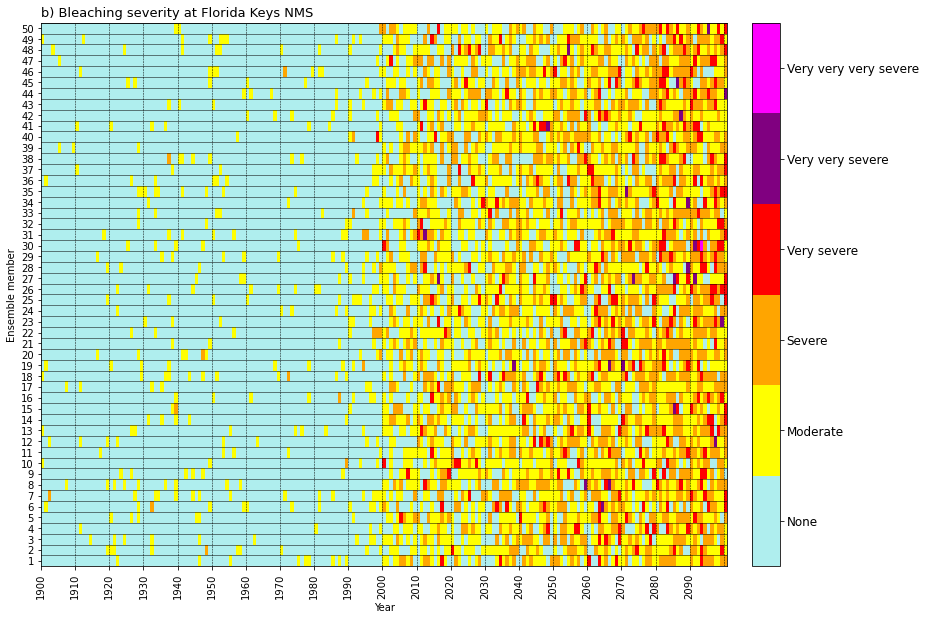

In [28]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1)

ax.set_title('b) Bleaching severity at '+ loc, loc='left', fontsize='13')

colorlist = ['paleturquoise', 'yellow', 'orange', 'red', 'purple','magenta']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('bleach', colorlist, N=6)

pc=ax.pcolormesh(ds_bleach.bleaching_index.isel(time=slice(50,nyear)),cmap=cmap,vmin=0,vmax=6)
ax.set_ylabel('Ensemble member')
ax.set_xlabel('Year')

cbar = fig.colorbar(pc, ax=ax, ticks=[0.5,1.5,2.5,3.5,4.5,5.5], pad=0.03)
cbar.ax.set_yticklabels(['None', 'Moderate', 'Severe', 'Very severe', 'Very very severe','Very very very severe'], fontsize=12) 

ax.set_yticks(ds_bleach.member_id.values-0.5)
ax.set_yticklabels(ds_bleach.member_id.values)

[ax.axhline(y=i, linewidth=0.5, color='black') for i in np.arange(1,nens+1,1)]

[ax.axvline(x=i, linewidth=0.5, linestyle='--',color='black') for i in np.arange(10,nyear-50,10)]

ax.set_xticks(np.arange(0,200,10));
ax.set_xticklabels(np.arange(1900,2100,10),rotation=90);

#fig.savefig('/glade/work/kristenk/figs/South_PuertoRico-Coral_bleaching_heatmap.png', bbox_inches='tight', dpi=300, format='png');

### Create rolling averages to assess severity of bleaching events several years in a row

In [29]:
start_i = 5
end_i = 245

moving_avg = np.full((end_i - start_i + 1),-99.)
moving_avg_dhm = np.full((end_i - start_i + 1),-99.)
time_center = np.full((end_i - start_i + 1),-99)

for ts in np.arange(start_i, end_i + 1,1):

    ### Do coral bleaching index
    avg = ds_bleach.bleaching_index.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values
    #print('year =', ts+900, '   avg=', avg)

    moving_avg[ts-5] = avg

    ### Do DHM
    avg = ds_bleach.DHM_max.isel(time=slice(ts-5,ts+5)).mean(dim=('time','member_id')).values

    moving_avg_dhm[ts-5] = avg
    
    time_center[ts-5] = ts+1850

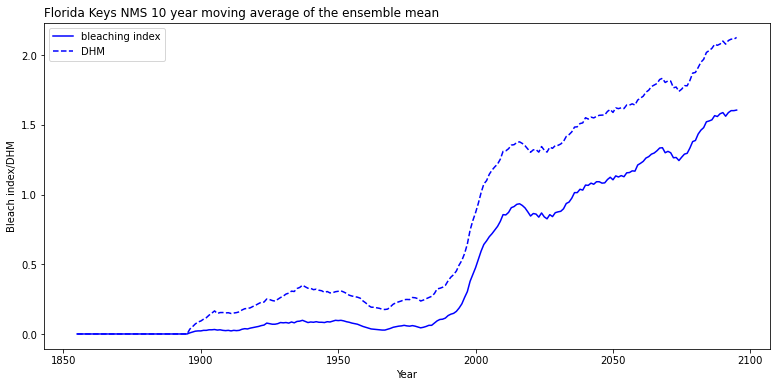

In [30]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1,1,1)
ax.set_title(loc+' 10 year moving average of the ensemble mean', loc='left')
ax.set_ylabel('Bleach index/DHM')
ax.set_xlabel('Year')

ax.plot(time_center,moving_avg,color='blue',label='bleaching index')

ax.plot(time_center,moving_avg_dhm,color='blue', linestyle='--',label='DHM')

ax.legend();
#ax.plot(npr_mean_val.time,npr_mean_val,color='red')

In [31]:
start_i = 5
end_i = 245

moving_avg = np.full((end_i - start_i + 1,nens),-99.)

moving_avg_dhm = np.full((end_i - start_i + 1,nens),-99.)

time_center = np.full((end_i - start_i + 1),-99)

for ts in np.arange(start_i, end_i + 1,1):

    for em in np.arange(0,nens,1):
        
        ### bleach metric
        avg = ds_bleach.bleaching_index.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
    
        moving_avg[ts-5,em] = avg

        ### DHMs
        avg = ds_bleach.DHM_max.isel(member_id=em,time=slice(ts-5,ts+5)).mean(dim='time').values
    
        moving_avg_dhm[ts-5,em] = avg
        
        time_center[ts-5] = ts+1850

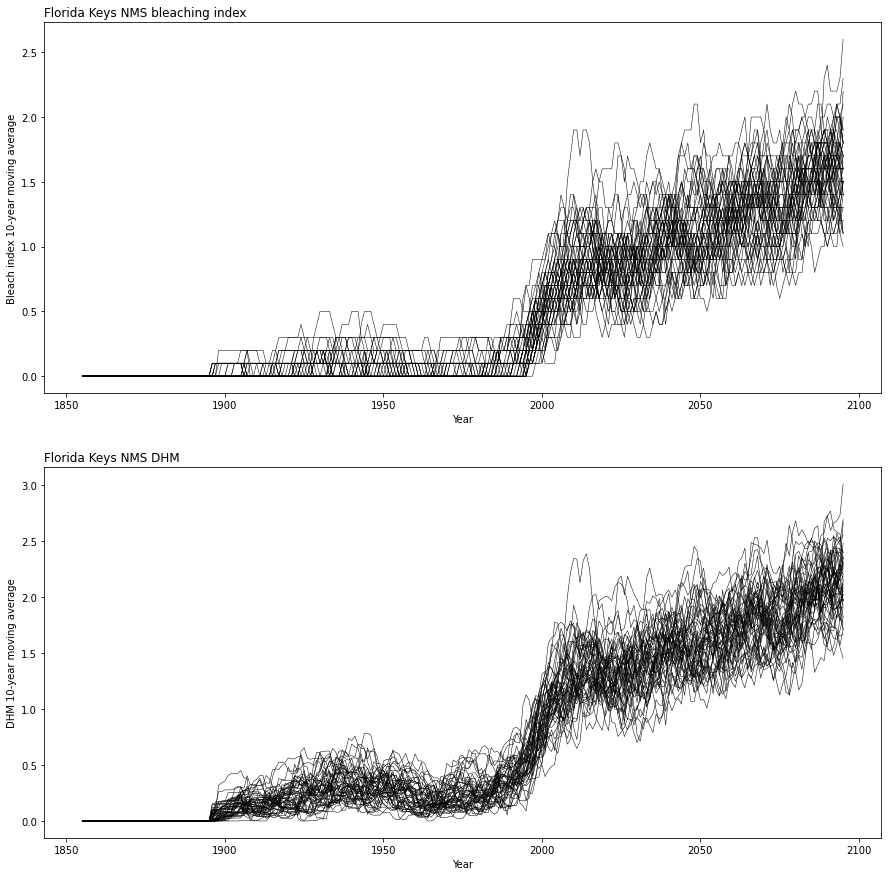

In [32]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2,1,1)
ax.set_title(loc+' bleaching index', loc='left')
ax.set_ylabel('Bleach index 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,nens,1):
    ax.plot(time_center,moving_avg[:,em],color='black',linewidth=0.5)

ax = fig.add_subplot(2,1,2)
ax.set_title(loc+' DHM', loc='left')
ax.set_ylabel('DHM 10-year moving average')
ax.set_xlabel('Year')
for em in np.arange(0,nens,1):
    ax.plot(time_center,moving_avg_dhm[:,em],color='black',linewidth=0.5)

### Make these moving averages in xarray data arrays, and then calculate a few more metrics

In [33]:
moving_avg = xr.DataArray(moving_avg,dims=('time','member_id'))
moving_avg_dhm = xr.DataArray(moving_avg_dhm,dims=('time','member_id'))

In [34]:
moving_avg_ensmax = moving_avg.max(dim='member_id')
moving_avg_dhm_ensmax = moving_avg_dhm.max(dim='member_id')

In [35]:
moving_avg_ensmin = moving_avg.min(dim='member_id')
moving_avg_dhm_ensmin = moving_avg_dhm.min(dim='member_id')

In [36]:
moving_avg_ensmean = moving_avg.mean(dim='member_id')
moving_avg_dhm_ensmean = moving_avg_dhm.mean(dim='member_id')

In [37]:
moving_avg_ensstd = moving_avg.std(dim='member_id')
moving_avg_dhm_ensstd = moving_avg_dhm.std(dim='member_id')

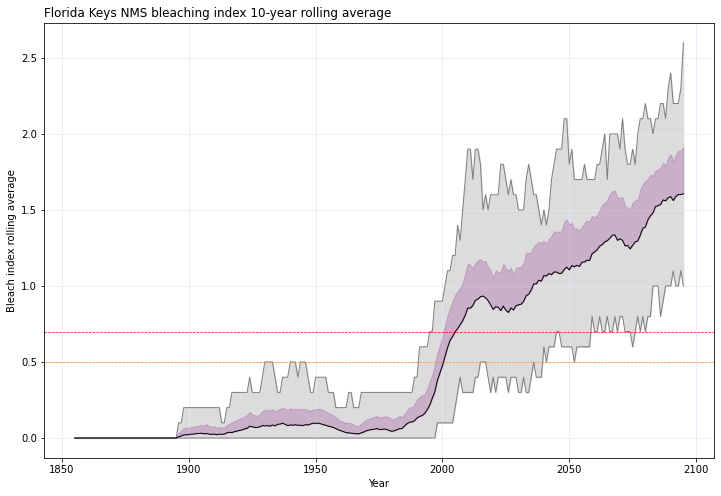

In [38]:
fig = plt.figure(figsize=(12,8))

##################################
ax = fig.add_subplot(1,1,1)
ax.set_title(loc+' bleaching index 10-year rolling average', loc='left')
ax.set_ylabel('Bleach index rolling average')
ax.set_xlabel('Year')

ax.plot(time_center,moving_avg_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_avg_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_avg_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_avg_ensmean,moving_avg_ensmean+ moving_avg_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.5,color='darkorange',linewidth=0.7,linestyle='--', label='persistent')
ax.axhline(0.7,color='red',linewidth=0.7,linestyle='--', label='unsustainable')

ax.fill_between(time_center, moving_avg_ensmin, moving_avg_ensmax, color='gainsboro', zorder=1);



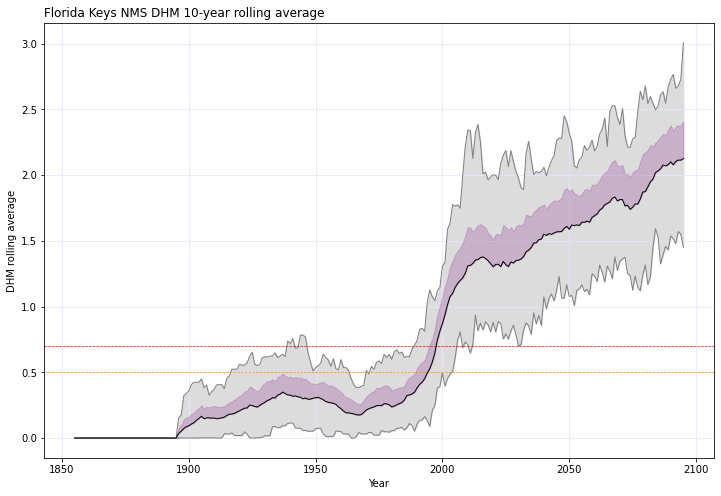

In [39]:
fig = plt.figure(figsize=(12,8))

##################################
ax = fig.add_subplot(1,1,1)
ax.set_title(loc+' DHM 10-year rolling average', loc='left')
ax.set_ylabel('DHM rolling average')
ax.set_xlabel('Year')

ax.plot(time_center,moving_avg_dhm_ensmean,color='black',linewidth=1,zorder=3)
ax.plot(time_center,moving_avg_dhm_ensmax,color='gray',linewidth=1,zorder=2)
ax.plot(time_center,moving_avg_dhm_ensmin,color='gray',linewidth=1,zorder=2);
ax.fill_between(time_center,moving_avg_dhm_ensmean,moving_avg_dhm_ensmean+ moving_avg_dhm_ensstd,color='purple',alpha=0.2,zorder=2)
ax.xaxis.grid(True, which='major',color='lavender',zorder=0)
ax.yaxis.grid(False, which='major',color='lavender',zorder=0)
ax.axhline(0.5,color='darkorange',linewidth=0.7,linestyle='--', label='persistent')
ax.axhline(0.7,color='red',linewidth=0.7,linestyle='--', label='unsustainable')

ax.fill_between(time_center, moving_avg_dhm_ensmin, moving_avg_dhm_ensmax, color='gainsboro', zorder=1);



### Write out netcdf of bleaching

In [40]:
ds_bleach.to_netcdf('/glade/derecho/scratch/kristenk/sanctuaries_proc/Florida_Keys_bleaching_metrics.nc', mode='w')